In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh

In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv('house.csv',header=None)
df.columns = ['af','sfd','sdf','sdf','3434','sdfq2wr','4sdfk','45','skdjf t', 'lkjadf','kj','this','that','blo','last']
df.head()

,af,sfd,sdf,sdf,3434,sdfq2wr,4sdfk,45,skdjf t,lkjadf,kj,this,that,blo,last
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


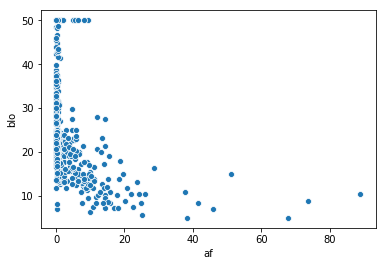

In [4]:
sns.scatterplot(df['af'],df['blo'])
plt.show()

In [5]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [6]:
from bokeh.io import show
from bokeh.plotting import figure

In [7]:
p = figure(height=300)
p.circle(x=df.loc[20:300].this, y=df.loc[20:300].that)
show(p)

In [8]:
p = figure(height=300)
#p.line(x=df.loc[20:300].this, y=df.loc[20:300].that)
p.cross(x=df.loc[20:300].this, y=df.loc[20:300].that,size=20)
show(p)

In [9]:
p = figure(height=300,y_axis_type='log',x_range=(20,250))
#p.line(x=df.loc[20:300].this, y=df.loc[20:300].that)
p.cross(x=df.loc[20:300].this, y=df.loc[20:300].that,size=20)
show(p)

In [10]:
p = figure(height=300,y_axis_type='log',x_range=(20,250),tools='')
#p.line(x=df.loc[20:300].this, y=df.loc[20:300].that)
p.cross(x=df.loc[20:300].this, y=df.loc[20:300].that,size=20,color='magenta')
show(p)

In [11]:
from bokeh.models import NumeralTickFormatter
p.xaxis[0].formatter = NumeralTickFormatter(format='0.0%')

In [12]:
show(p)

In [13]:
p.xaxis[0].formatter = NumeralTickFormatter(format='0,') # will place commas between thousands (1,000,000 etc)

In [14]:
from bokeh.models import ColumnDataSource

In [17]:
s = 1000
X = np.random.normal(size=s)
Y = X**2 + np.random.normal(size=s)
Z = ((X**2+Y**2)<4).astype(int)
Size = np.abs(X+Y)+0.1

source = ColumnDataSource(dict(x=X,y=Y,z=Z,size=Size))

In [18]:
source.column_names

['x', 'y', 'z', 'size']

In [19]:
p = figure(height=300)
p.circle(x='x',y='y',source=source)
show(p)

In [20]:
from bokeh.models import HoverTool

In [21]:
hover = HoverTool(tooltips='@z')

In [22]:
p = figure(height=300,tools=[hover])
p.circle(x='x',y='y',source=source)
show(p)

In [23]:
hover = HoverTool(tooltips='@z',show_arrow=False)
p = figure(height=300,tools=[hover])
p.circle(x='x',y='y',source=source)
show(p)

In [24]:
# DataSource can take a pd DataFrame

In [25]:
hover = HoverTool(tooltips='@z',show_arrow=False)
p = figure(height=300,tools=[hover])
p.circle(x='x',y='y',source=source,size='size')
show(p)

In [26]:
# If I get a javascript error, I HAVE to restart the entire notebook

In [27]:
# if sizes are not good and they cover the whole plot:
from bokeh.models import LinearInterpolator

# make the smaller ones bigger
size_mapper = LinearInterpolator(x=[Size.min(),Size.max()],y=[2,Size.max()])

args = dict(title='testing playing',toolbar_location='above',tools = [HoverTool(tooltips='@z',show_arrow=False)],height=300)

p = figure(**args)
p.circle(x='x',y='y',source=source,size={'field':'size','transform':size_mapper})
show(p)

In [28]:
args = dict(title='testing playing',title_location='right',toolbar_location='above',tools = [HoverTool(tooltips='@z',show_arrow=False)],height=300)

p = figure(**args)
p.circle(x='x',y='y',source=source,size={'field':'size','transform':size_mapper})
show(p)

In [29]:
# typing nonsense will print at the end all the available options
args = dict(kjsdfj='',title='testing playing',title_location='right',toolbar_location='above',tools = [HoverTool(tooltips='@z',show_arrow=False)],height=300)

p = figure(**args)
p.circle(x='x',y='y',source=source,size={'field':'size','transform':size_mapper})
show(p)

AttributeError: unexpected attribute 'kjsdfj' to Figure, possible attributes are above, aspect_scale, background_fill_alpha, background_fill_color, below, border_fill_alpha, border_fill_color, css_classes, disabled, extra_x_ranges, extra_y_ranges, h_symmetry, height, hidpi, inner_height, inner_width, js_event_callbacks, js_property_callbacks, layout_height, layout_width, left, lod_factor, lod_interval, lod_threshold, lod_timeout, match_aspect, min_border, min_border_bottom, min_border_left, min_border_right, min_border_top, name, outline_line_alpha, outline_line_cap, outline_line_color, outline_line_dash, outline_line_dash_offset, outline_line_join, outline_line_width, output_backend, plot_height, plot_width, renderers, right, sizing_mode, subscribed_events, tags, title, title_location, toolbar, toolbar_location, toolbar_sticky, v_symmetry, width, x_range, x_scale, y_range or y_scale

In [30]:
from bokeh.models import CategoricalColorMapper
from bokeh.palettes import Spectral6

In [32]:
Z = (np.round(X**2+Y**2)%6).astype(str)
source = ColumnDataSource(dict(x=X,y=Y,z=Z,size=Size))

In [33]:
color_mapper = CategoricalColorMapper(factors=list(np.unique(Z)),palette=Spectral6)

In [34]:
args = dict(title='testing playing',title_location='right',
            toolbar_location='above',tools = [HoverTool(tooltips='@z',show_arrow=False)],
            height=300)

p = figure(**args)
p.circle(x='x',y='y',source=source,size={'field':'size','transform':size_mapper},color={'field':'z','transform':color_mapper})
show(p)

In [35]:
args = dict(title='testing playing',title_location='right',
            toolbar_location='above',tools = [HoverTool(tooltips='@z',show_arrow=False)],
            height=300)

p = figure(**args)
p.circle(x='x',y='y',source=source,size={'field':'size','transform':size_mapper},
         color={'field':'z','transform':color_mapper}
        ,legend='z')
show(p)

In [36]:
p = figure(**args)
p.circle(x='x',y='y',source=source,size={'field':'size','transform':size_mapper},
         color={'field':'z','transform':color_mapper}
        ,legend='z')
# Legend has been properly added, check how it is done
p.legend.border_line_color = None
p.legend.location = (0,30)
p.right.append(p.legend[0])
show(p)

In [45]:
from ipywidgets import interact
from bokeh.io import push_notebook

In [46]:
p = figure(**args)
p.circle(x='x',y='y',source=source,size={'field':'size','transform':size_mapper},
         color={'field':'z','transform':color_mapper}
        ,legend='z')
# Legend has been properly added, check how it is done
p.legend.border_line_color = None
p.legend.location = (0,30)
p.right.append(p.legend[0])
show(p,notebook_handle=True)

In [47]:
def update(cutoff):
    new_data = dict(x=X[np.abs(X)<cutoff],y=Y[np.abs(X)<cutoff],
                    z=Z[np.abs(X)<cutoff],size=Size[np.abs(X)<cutoff])
    source.data = new_data
    push_notebook()

In [48]:
interact(update,cutoff=(0,3,0.1))

<function __main__.update(cutoff)>

In [49]:
p = figure(**args)
p.circle(x='x',y='y',source=source,size={'field':'size','transform':size_mapper},
         color={'field':'z','transform':color_mapper}
        ,legend='z')
# Legend has been properly added, check how it is done
p.legend.border_line_color = None
p.legend.location = (0,30)
p.right.append(p.legend[0])
show(p,notebook_handle=True)

In [50]:
interact(update,cutoff=(0,3,0.1))

<function __main__.update(cutoff)>

In [56]:
interact(update,cutoff=(1900,2000,1))

<function __main__.update(cutoff)>

In [59]:
interact(update,cutoff=3)

<function __main__.update(cutoff)>

In [60]:
# try to see why the widget doesn't display

In [62]:
# also look up other types of plots (box, bars, histograms)

# also look up maps

# also look up shader stuff (for too many points)